In [65]:
import matplotlib.pyplot as plt
import os
import math as m

In [32]:
os.listdir()

['.ipynb_checkpoints',
 '08_01_19-3.scan',
 '08_01_19-3.scan.png',
 '09_01_19-1.scan',
 '09_01_19-1.scan.png',
 '09_01_19-3.scan',
 '11_01_19-3.scan',
 '11_01_19-3.scan.png',
 '11_01_19-4.scan',
 '11_01_19-4.scan.png',
 'Baseline.bat',
 'errorBar.ipynb',
 'FELion_avgSpec.py',
 'FELion_baseline.py',
 'FELion_GUI_Baseline_v2.py',
 'FELion_GUI_v2.py',
 'FELion_Icon.ico',
 'FELion_massSpec.py',
 'FELion_normline.py',
 'FELion_power.py',
 'FELion_sa.py',
 'GUI_Baseline.py',
 'GUI_Normline.py',
 'GUI_Powerfile.py',
 'GUI_settings.py',
 'GUI_test1.py',
 'just_avg.py',
 'LICENSE',
 'Normline.bat',
 'Powerfile.bat',
 'README.md',
 'test_baseline.bat',
 'test_normline.bat',
 'test_run.py',
 '__pycache__']

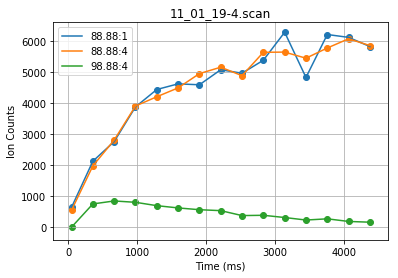

In [33]:
filename = "11_01_19-4.scan"
datas, mass_values = [], []
f = open(filename, "r")

for line in f:
    if not line[0] == "#" and not line == "\n":
        a = line.split()
        datas.append(a)
        if line.strip() == "ALL:":
            del datas[-1]
            break
no_of_mass = len(datas[0])-2

f.close()

f = open(filename, "r")
for line in f:
    if line.find("#mass")>=0:
        tmp = line[5:].split(":")
        tmp.append(":")
        tmp = tmp[0].strip()+tmp[-1]+tmp[1].strip()
        mass_values.append(tmp)
f.close()

d = {}

for i in range(no_of_mass):
    d["mass_#{0}".format(i)] = []

for i in range(len(d)):
    d['mass_#{}'.format(i)] = [j[i+1] for j in datas]
    d['mass_#{}'.format(i)] = [float(j) for j in d['mass_#{}'.format(i)]]

time = [i[0] for i in datas]
time = [float(i) for i in time]

for i in range(no_of_mass):
    plt.scatter(time, d['mass_#{}'.format(i)])
    plt.plot(time, d['mass_#{}'.format(i)], label = mass_values[i])

plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Ion Counts")
plt.legend()
plt.title(filename)
plt.savefig(filename+".png")
plt.show()
plt.close()

In [34]:
#Error bar calculations:
iterations = [int(i.split(":")[-1]) for i in mass_values]
start = False
no_of_times = 0
raw_datas = []

f = open(filename, "r")

for line in f:
    if not line[0]=="#" and not line == "\n":
        line.strip()
        tmp = line.split()
        if tmp[0]=="ALL:":
            start = True
            continue
        if start:
            no_of_times += 1
            raw_datas.append(line.strip())
        total = int(no_of_times/sum(iterations))    
f.close()

values = []
for datas in raw_datas:
    values.append(datas.split())
values = [[float(i) for i in j] for j in values]

all_datas = []
for j in range(sum(iterations)):
    i = j*total
    all_datas.append(values[i:i+total])

samples = {}
for i in range(no_of_mass):
    samples["mass_sample_{}".format(i)] = []

k,l = 0, -1
for i in iterations:
    #print("i is: %i"%i)
    l += 1
    #print("l is : %i"%l)
    for j in range(i):
        #print("j is : %i"%j)
        #print("k is : %i"%k)
        samples["mass_sample_{}".format(l)].append(all_datas[k])
        k += 1
    #print()

In [35]:
iterations[1]

4

In [36]:
data_run = len(samples["mass_sample_1"][0])
print(data_run, type(data_run))

16 <class 'int'>


In [37]:
k = 0
mass_count_avg, all_mass_count = [], []

for i in iterations:
    
    if i>1:
        to_avg = [[samples["mass_sample_{}".format(k)][j][m][2] for m in range(data_run)] for j in range(i)]
        all_mass_count.append(to_avg)
        mass = [[to_avg[l][j] for l in range(i)] for j in range(data_run)]
        mass_count = [sum(mass[j])/i for j in range(len(mass))]
        mass_count_avg.append(mass_count)
    k += 1
    
print(all_mass_count)
print()
print(mass_count_avg)

[[[602.0, 2174.0, 2945.0, 4017.0, 3758.0, 4177.0, 4876.0, 4574.0, 4580.0, 5644.0, 5432.0, 5200.0, 5572.0, 5962.0, 5536.0, 6008.0], [543.0, 1758.0, 2251.0, 3741.0, 4350.0, 4574.0, 4431.0, 5348.0, 4961.0, 5424.0, 5943.0, 5306.0, 5610.0, 6161.0, 5911.0, 6053.0], [726.0, 2212.0, 2846.0, 3957.0, 4621.0, 4430.0, 4861.0, 5168.0, 4944.0, 6027.0, 5657.0, 5862.0, 5835.0, 6533.0, 5674.0, 6104.0], [315.0, 1750.0, 3176.0, 3886.0, 4066.0, 4756.0, 5606.0, 5510.0, 5023.0, 5423.0, 5512.0, 5391.0, 6055.0, 5603.0, 6263.0, 6341.0]], [[1.0, 696.0, 769.0, 977.0, 922.0, 651.0, 601.0, 417.0, 341.0, 323.0, 354.0, 195.0, 379.0, 220.0, 99.0, 213.0], [4.0, 725.0, 1031.0, 393.0, 418.0, 594.0, 621.0, 561.0, 432.0, 440.0, 222.0, 325.0, 250.0, 110.0, 207.0, 263.0], [0.0, 742.0, 828.0, 951.0, 744.0, 613.0, 538.0, 525.0, 270.0, 421.0, 284.0, 270.0, 233.0, 235.0, 154.0, 126.0], [0.0, 834.0, 752.0, 885.0, 691.0, 625.0, 494.0, 630.0, 455.0, 351.0, 388.0, 134.0, 218.0, 178.0, 186.0, 154.0]]]

[[546.5, 1973.5, 2804.5, 3900.

In [38]:
j = 0
for i in iterations:
    print(d["mass_#{}".format(j)])
    print()
    j += 1

[640.0, 2124.0, 2756.0, 3872.0, 4432.0, 4614.0, 4584.0, 5068.0, 4956.0, 5374.0, 6275.0, 4820.0, 6202.0, 6110.0, 5815.0]

[546.5, 1973.5, 2804.5, 3900.25, 4198.75, 4484.25, 4943.5, 5150.0, 4877.0, 5629.5, 5636.0, 5439.75, 5768.0, 6064.75, 5846.0]

[1.25, 749.25, 845.0, 801.5, 693.75, 620.75, 563.5, 533.25, 374.5, 383.75, 312.0, 231.0, 270.0, 185.75, 161.5]



In [85]:
more_iterations_count = 0
varience = {}
for i in iterations:
    if i>1:
        more_iterations_count += 1
for i in range(more_iterations_count):
    print("all_mass_count[%i]"%i)
    print(all_mass_count[i])
    print()
for i in range(more_iterations_count):
    varience["varience_{}".format(i)] = []
print(varience)

all_mass_count[0]
[[602.0, 2174.0, 2945.0, 4017.0, 3758.0, 4177.0, 4876.0, 4574.0, 4580.0, 5644.0, 5432.0, 5200.0, 5572.0, 5962.0, 5536.0, 6008.0], [543.0, 1758.0, 2251.0, 3741.0, 4350.0, 4574.0, 4431.0, 5348.0, 4961.0, 5424.0, 5943.0, 5306.0, 5610.0, 6161.0, 5911.0, 6053.0], [726.0, 2212.0, 2846.0, 3957.0, 4621.0, 4430.0, 4861.0, 5168.0, 4944.0, 6027.0, 5657.0, 5862.0, 5835.0, 6533.0, 5674.0, 6104.0], [315.0, 1750.0, 3176.0, 3886.0, 4066.0, 4756.0, 5606.0, 5510.0, 5023.0, 5423.0, 5512.0, 5391.0, 6055.0, 5603.0, 6263.0, 6341.0]]

all_mass_count[1]
[[1.0, 696.0, 769.0, 977.0, 922.0, 651.0, 601.0, 417.0, 341.0, 323.0, 354.0, 195.0, 379.0, 220.0, 99.0, 213.0], [4.0, 725.0, 1031.0, 393.0, 418.0, 594.0, 621.0, 561.0, 432.0, 440.0, 222.0, 325.0, 250.0, 110.0, 207.0, 263.0], [0.0, 742.0, 828.0, 951.0, 744.0, 613.0, 538.0, 525.0, 270.0, 421.0, 284.0, 270.0, 233.0, 235.0, 154.0, 126.0], [0.0, 834.0, 752.0, 885.0, 691.0, 625.0, 494.0, 630.0, 455.0, 351.0, 388.0, 134.0, 218.0, 178.0, 186.0, 154.0

In [122]:
for i in range(more_iterations_count):
    print("all_mass_count[%i]"%i)
    print(all_mass_count[i])
    for j in range(len(all_mass_count[i])):
        for k in range(len(all_mass_count[i][j])):
            varience["varience_{}".format(i)].append(all_mass_count

all_mass_count[0]
[[602.0, 2174.0, 2945.0, 4017.0, 3758.0, 4177.0, 4876.0, 4574.0, 4580.0, 5644.0, 5432.0, 5200.0, 5572.0, 5962.0, 5536.0, 6008.0], [543.0, 1758.0, 2251.0, 3741.0, 4350.0, 4574.0, 4431.0, 5348.0, 4961.0, 5424.0, 5943.0, 5306.0, 5610.0, 6161.0, 5911.0, 6053.0], [726.0, 2212.0, 2846.0, 3957.0, 4621.0, 4430.0, 4861.0, 5168.0, 4944.0, 6027.0, 5657.0, 5862.0, 5835.0, 6533.0, 5674.0, 6104.0], [315.0, 1750.0, 3176.0, 3886.0, 4066.0, 4756.0, 5606.0, 5510.0, 5023.0, 5423.0, 5512.0, 5391.0, 6055.0, 5603.0, 6263.0, 6341.0]]
all_mass_count[1]
[[1.0, 696.0, 769.0, 977.0, 922.0, 651.0, 601.0, 417.0, 341.0, 323.0, 354.0, 195.0, 379.0, 220.0, 99.0, 213.0], [4.0, 725.0, 1031.0, 393.0, 418.0, 594.0, 621.0, 561.0, 432.0, 440.0, 222.0, 325.0, 250.0, 110.0, 207.0, 263.0], [0.0, 742.0, 828.0, 951.0, 744.0, 613.0, 538.0, 525.0, 270.0, 421.0, 284.0, 270.0, 233.0, 235.0, 154.0, 126.0], [0.0, 834.0, 752.0, 885.0, 691.0, 625.0, 494.0, 630.0, 455.0, 351.0, 388.0, 134.0, 218.0, 178.0, 186.0, 154.0]

In [40]:
w, h = 8, 5;
Matrix = [[0 for x in range(w)] for y in range(h)]

Matrix

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [121]:
all_mass_count[0]
len(all_mass_count[0])

4